In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv')
data = df[['AT', 'V', 'AP', 'RH', 'EP']]
X = df[['AT', 'V', 'AP', 'RH']]
y = df[['EP']]
data.head()

,AT,V,AP,RH,EP
0,28.62,69.71,1009.67,62.12,437.52
1,14.84,41.48,1017.26,63.42,460.30
2,26.04,74.67,1016.68,81.20,433.55
3,13.55,42.99,1007.58,97.55,470.82
4,20.10,59.87,1018.97,87.23,444.71


In [3]:
test = pd.read_csv('test.csv')
test_data = test[['AT', 'V', 'AP', 'RH']]
test_data.head()

,AT,V,AP,RH
0,8.91,40.69,1015.11,89.65
1,25.63,48.92,1009.99,34.64
2,18.98,60.10,1010.09,85.34
3,8.02,39.04,1018.49,68.07
4,34.10,73.03,1014.01,41.26


In [4]:
print("Shape: " + str(data.shape) + '\n' )

Shape: (8500, 5)



### Imputing Outliers

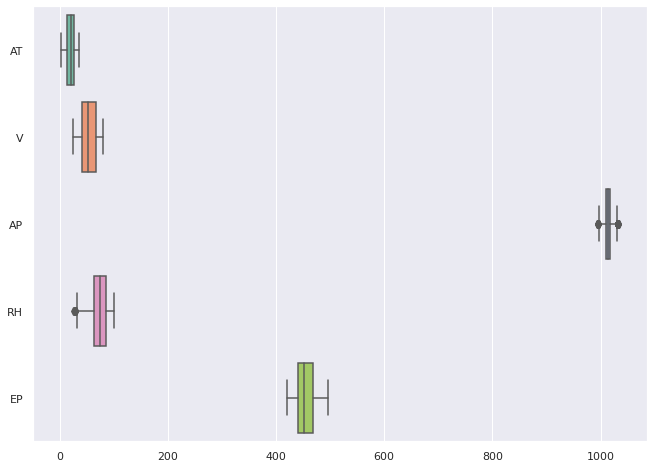

In [5]:
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.boxplot(data=data, orient="h", palette="Set2")

#### Imputing Outliers using Mean

In [6]:
def mean_outliers_imputation(features):
    for i in features.columns:
        fence = 1
        Q1=features[i].quantile(0.25)
        Q3=features[i].quantile(0.75)
        IQR=Q3-Q1
        Lower_Whisker = Q1-fence*IQR
        Upper_Whisker = Q3+fence*IQR
        features[i] = features[i].apply(lambda x: features[i].mean() if (x > Upper_Whisker or x < Lower_Whisker)  else x)


In [7]:
mean_outliers_imputation(X)

/tmp/ipykernel_28509/195361688.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[i] = features[i].apply(lambda x: features[i].mean() if (x > Upper_Whisker or x < Lower_Whisker)  else x)


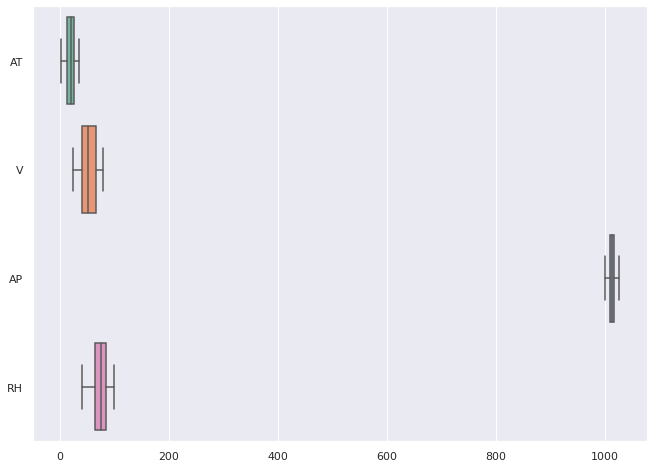

In [8]:
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.boxplot(data=X, orient="h", palette="Set2")

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)
X_train

,AT,V,AP,RH
6942,10.25,41.46,1020.650000,87.07
5694,22.63,58.41,1013.690000,90.32
8047,14.49,42.86,1013.940000,88.20
425,21.71,58.05,1013.070000,85.75
383,13.34,40.80,1013.254513,64.85
...,...,...,...,...
5606,17.93,44.63,1003.540000,87.41
1356,28.31,71.85,1009.000000,77.56
5482,15.74,43.71,1024.700000,78.38
2509,25.62,60.29,1017.810000,51.24


### 1. Regression

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_valid)

In [11]:
lm.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [12]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print('r2 score : {0:0.4f}'.format(metrics.r2_score(y_valid, y_pred)))

Mean Absolute Error (MAE): 3.662866890242643
Mean Squared Error (MSE): 21.85470350717785
Root Mean Squared Error (RMSE): 4.674901443579089
r2 score : 0.9259


### 2. Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100 ,random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_valid)

/tmp/ipykernel_28509/2026547853.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


In [14]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [15]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print('r2 score : {0:0.4f}'.format(metrics.r2_score(y_valid, y_pred)))

Mean Absolute Error (MAE): 2.512497117647054
Mean Squared Error (MSE): 12.496320426299977
Root Mean Squared Error (RMSE): 3.5350134973292504
r2 score : 0.9576


In [16]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train)

In [17]:
# {'bootstrap': False,
#  'max_depth': 58,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 3,
#  'n_estimators': 710}

In [18]:
rfr = RandomForestRegressor(bootstrap=False, max_depth=58, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, n_estimators=710  ,random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_valid)

/tmp/ipykernel_28509/2373669881.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


In [19]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print('r2 score : {0:0.4f}'.format(metrics.r2_score(y_valid, y_pred)))


Mean Absolute Error (MAE): 2.352706603148328
Mean Squared Error (MSE): 11.581310125418716
Root Mean Squared Error (RMSE): 3.4031323990433746
r2 score : 0.9607


#### Testing Model

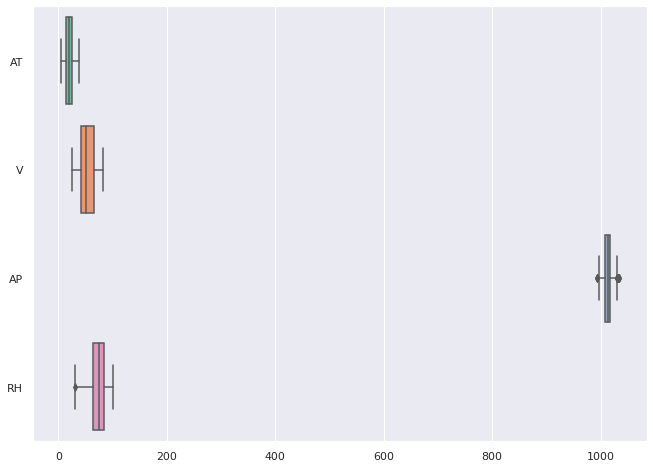

In [20]:
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.boxplot(data=test_data, orient="h", palette="Set2")

/tmp/ipykernel_28509/195361688.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[i] = features[i].apply(lambda x: features[i].mean() if (x > Upper_Whisker or x < Lower_Whisker)  else x)


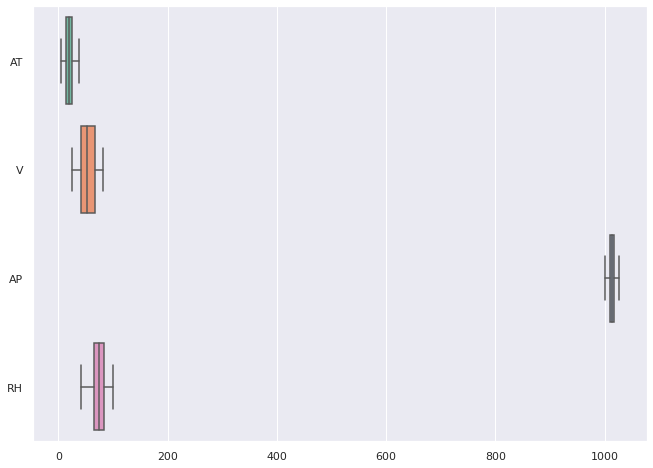

In [21]:
mean_outliers_imputation(test_data)
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.boxplot(data=test_data, orient="h", palette="Set2")

In [22]:
test_pred = rfr.predict(test_data)
test_pred

array([476.9983662 , 442.92635211, 450.44078169, ..., 456.80592958,
       433.56867606, 479.00130986])

In [23]:
output = pd.DataFrame({'ID': test.ID,
                       'EP': test_pred})
output.to_csv('submission_190564N.csv', index=False)